In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Loading the dataset
diabetes_data = pd.read_csv('.\diabetes.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
## observing the shape of the data
diabetes_data.shape

(768, 9)

In [4]:
X = diabetes_data.drop("Outcome",axis = 1)
y = diabetes_data.Outcome

In [5]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [6]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

# Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.703


The accuracy on the training set is 100%, while the test set accuracy is much worse. This is an indicative that the tree is overfitting and not generalizing well to new data. Therefore, we need to apply pre-pruning to the tree.

We set max_depth=3, limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.

In [8]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=0)
dt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 0.793
Accuracy on test set: 0.730


In [9]:
y_pred = dt.predict(X_test)


In [10]:
from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[145  22]
 [ 47  42]]
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       167
           1       0.66      0.47      0.55        89

    accuracy                           0.73       256
   macro avg       0.71      0.67      0.68       256
weighted avg       0.72      0.73      0.72       256



In [11]:
#DT visualizatin method 1

from sklearn.tree import export_graphviz

dotfile = open("dt2.dot", 'w')

export_graphviz(dt, out_file=dotfile,feature_names = X.columns,class_names=['0','1'])
dotfile.close()
# Copying the contents of the created file ('dt2.dot' ) to a graphviz rendering agent at http://webgraphviz.com/
# check out https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html

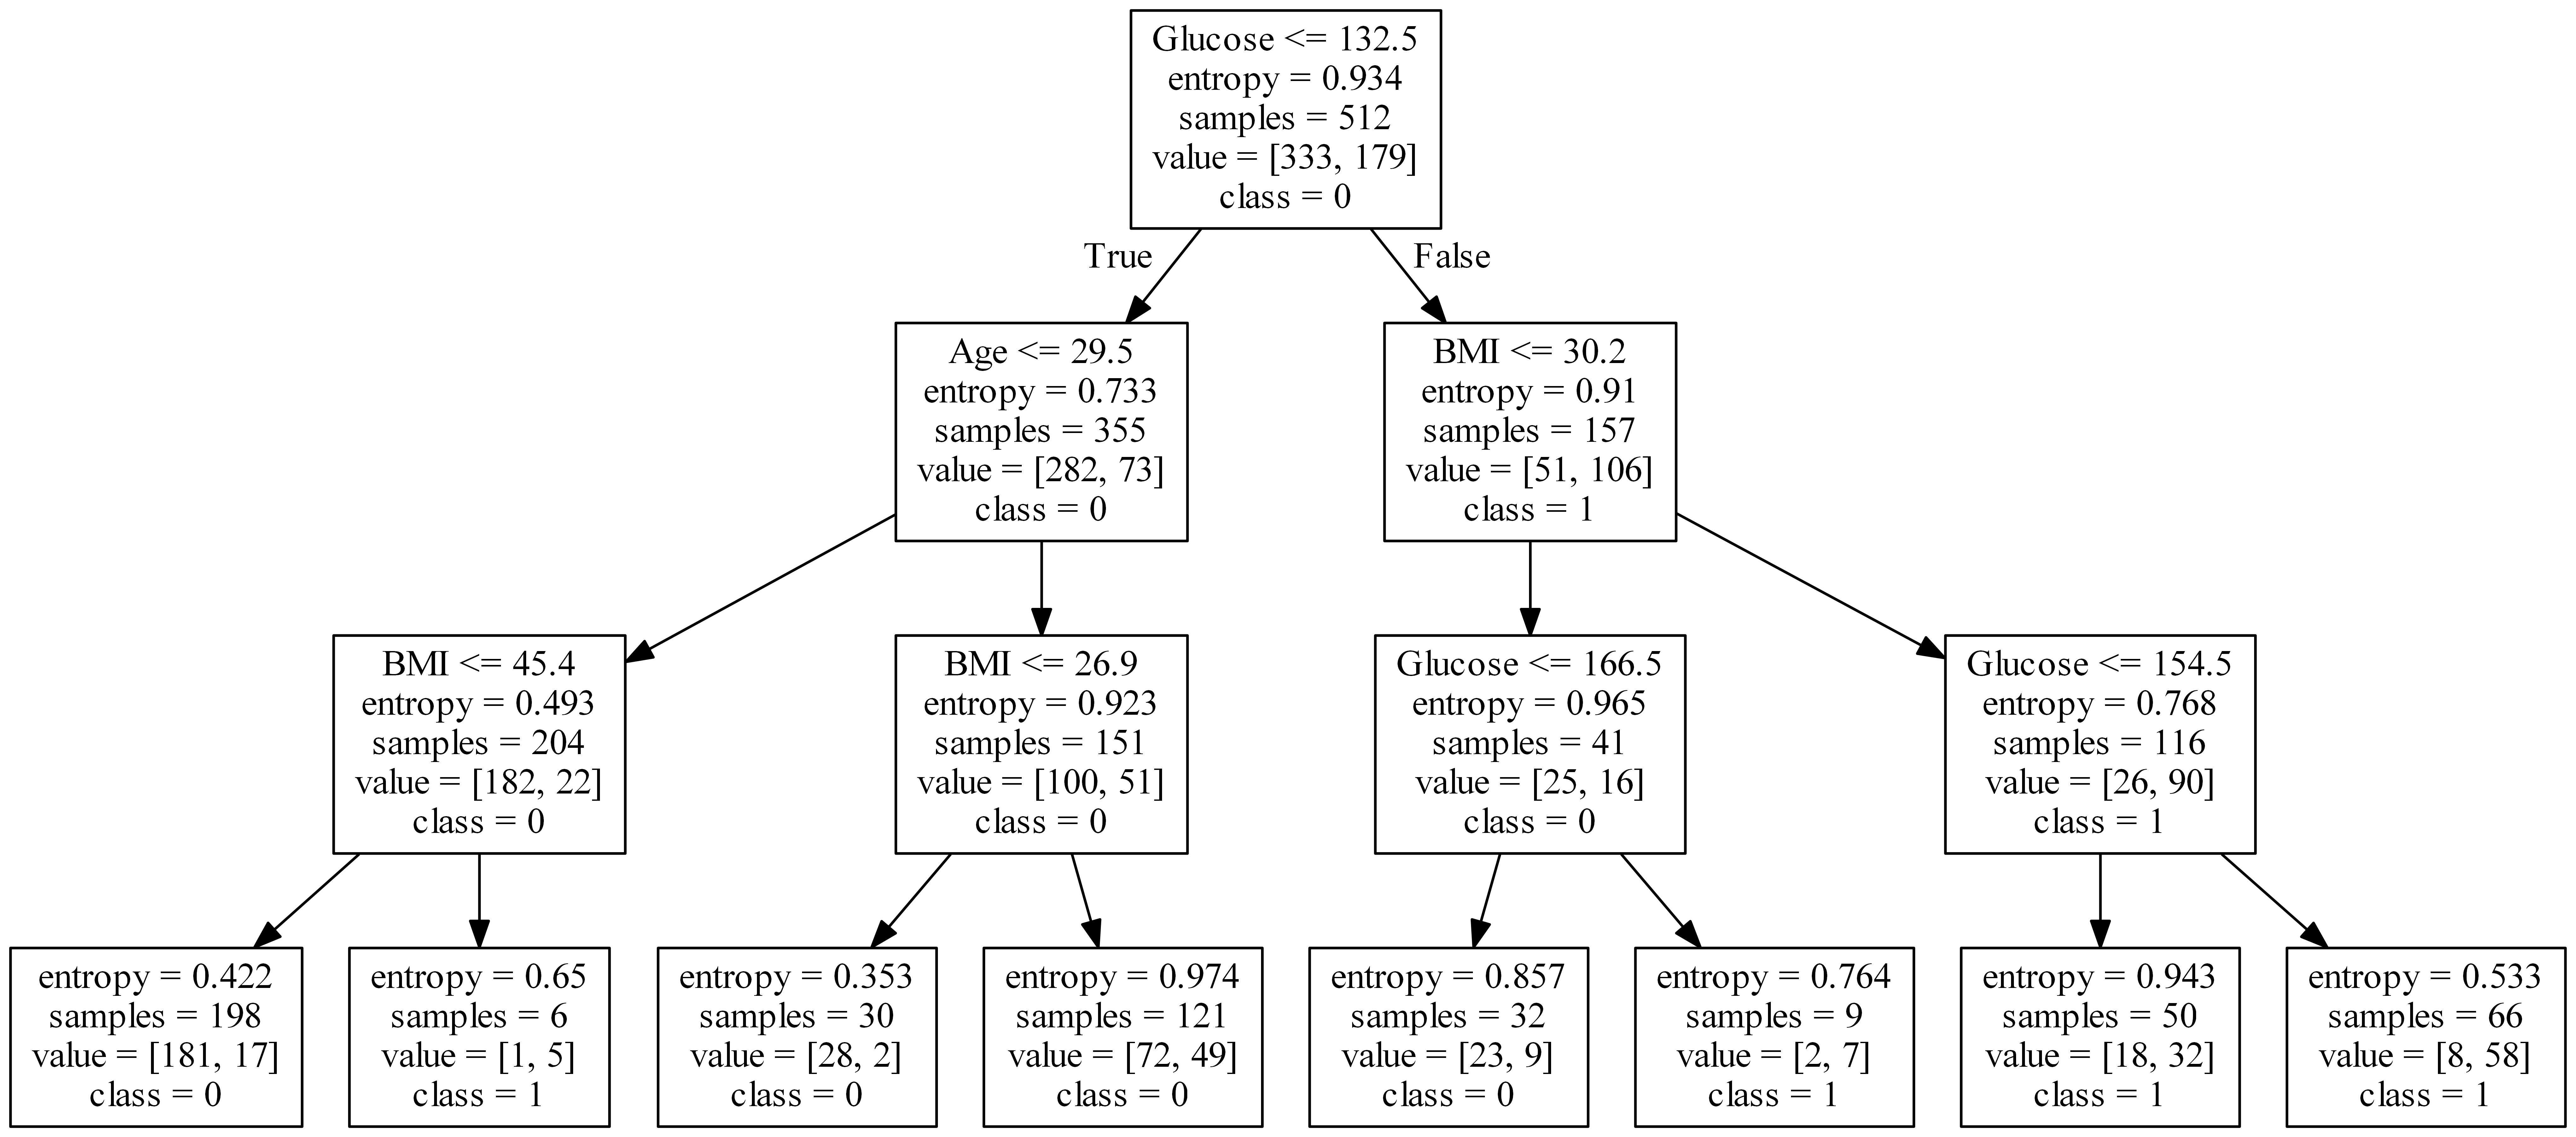

In [12]:
#DT visualizatin method 2
# need to install Graphviz first https://graphviz.gitlab.io/_pages/Download/Download_windows.html
from sklearn.tree import export_graphviz
import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

export_graphviz(dt, out_file='tree.dot', feature_names=X.columns,class_names=['0','1'])
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')


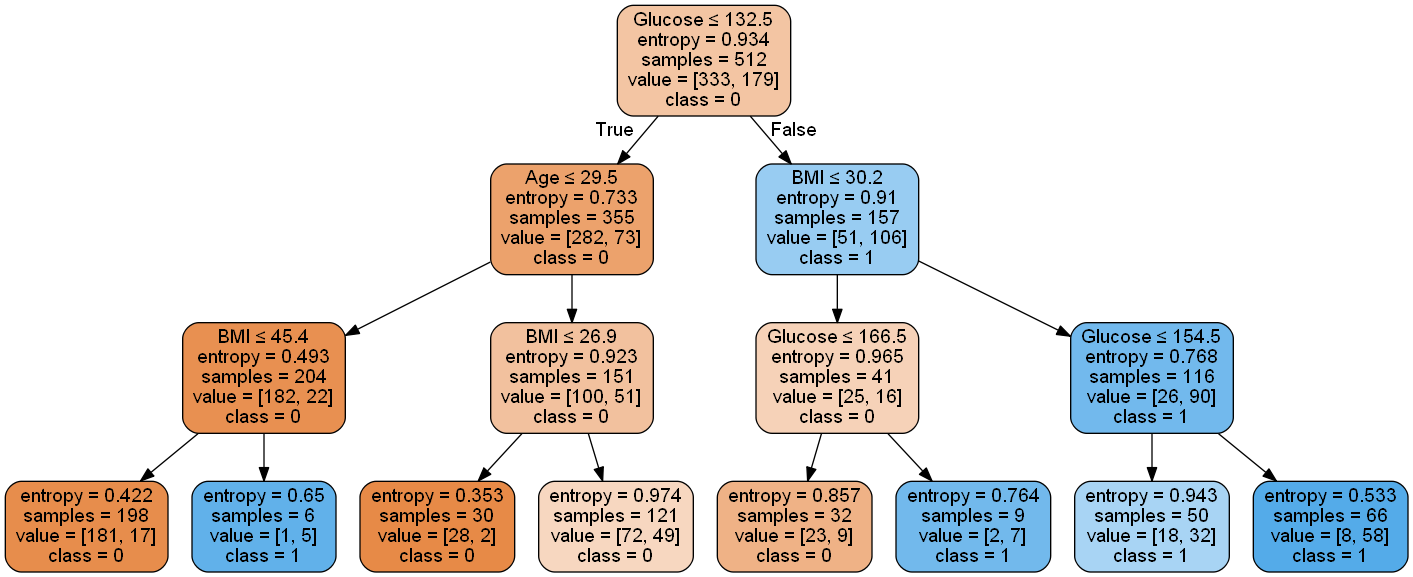

In [13]:
#DT visualizatin method 3
#!conda install -y pydotplus
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [14]:
#Plot ROC chart for DT.Write your code below.

In [15]:
#Adjust the decision tree parameters to improve the performance.Write your code below.



In [16]:
#find out the feature importance from the decision tree built above. Write your code below.


# NN

In [17]:

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [18]:
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000,verbose=2)  
mlp.fit(X_train, y_train)  

Iteration 1, loss = 0.65835547
Iteration 2, loss = 0.65193520
Iteration 3, loss = 0.64619247
Iteration 4, loss = 0.64022246
Iteration 5, loss = 0.63493733
Iteration 6, loss = 0.62964695
Iteration 7, loss = 0.62433070
Iteration 8, loss = 0.61921054
Iteration 9, loss = 0.61408174
Iteration 10, loss = 0.60925794
Iteration 11, loss = 0.60426378
Iteration 12, loss = 0.59958039
Iteration 13, loss = 0.59490529
Iteration 14, loss = 0.59013140
Iteration 15, loss = 0.58566805
Iteration 16, loss = 0.58102618
Iteration 17, loss = 0.57658540
Iteration 18, loss = 0.57217918
Iteration 19, loss = 0.56774103
Iteration 20, loss = 0.56336311
Iteration 21, loss = 0.55928376
Iteration 22, loss = 0.55532340
Iteration 23, loss = 0.55126996
Iteration 24, loss = 0.54753454
Iteration 25, loss = 0.54353555
Iteration 26, loss = 0.54017068
Iteration 27, loss = 0.53634413
Iteration 28, loss = 0.53301188
Iteration 29, loss = 0.52939352
Iteration 30, loss = 0.52631429
Iteration 31, loss = 0.52310569
Iteration 32, los

Iteration 333, loss = 0.37723517
Iteration 334, loss = 0.37694647
Iteration 335, loss = 0.37669786
Iteration 336, loss = 0.37640621
Iteration 337, loss = 0.37612435
Iteration 338, loss = 0.37591098
Iteration 339, loss = 0.37565939
Iteration 340, loss = 0.37541192
Iteration 341, loss = 0.37502874
Iteration 342, loss = 0.37483553
Iteration 343, loss = 0.37452134
Iteration 344, loss = 0.37422283
Iteration 345, loss = 0.37404215
Iteration 346, loss = 0.37372967
Iteration 347, loss = 0.37357443
Iteration 348, loss = 0.37349498
Iteration 349, loss = 0.37313053
Iteration 350, loss = 0.37280425
Iteration 351, loss = 0.37260480
Iteration 352, loss = 0.37243855
Iteration 353, loss = 0.37216614
Iteration 354, loss = 0.37200271
Iteration 355, loss = 0.37173278
Iteration 356, loss = 0.37160467
Iteration 357, loss = 0.37138217
Iteration 358, loss = 0.37108392
Iteration 359, loss = 0.37087474
Iteration 360, loss = 0.37062813
Iteration 361, loss = 0.37046581
Iteration 362, loss = 0.37031619
Iteration 

Iteration 612, loss = 0.33532095
Iteration 613, loss = 0.33525367
Iteration 614, loss = 0.33520790
Iteration 615, loss = 0.33522982
Iteration 616, loss = 0.33497442
Iteration 617, loss = 0.33489747
Iteration 618, loss = 0.33474843
Iteration 619, loss = 0.33467938
Iteration 620, loss = 0.33463147
Iteration 621, loss = 0.33453763
Iteration 622, loss = 0.33446754
Iteration 623, loss = 0.33431456
Iteration 624, loss = 0.33410517
Iteration 625, loss = 0.33407483
Iteration 626, loss = 0.33398051
Iteration 627, loss = 0.33380923
Iteration 628, loss = 0.33377883
Iteration 629, loss = 0.33371407
Iteration 630, loss = 0.33355062
Iteration 631, loss = 0.33335840
Iteration 632, loss = 0.33320002
Iteration 633, loss = 0.33307996
Iteration 634, loss = 0.33303403
Iteration 635, loss = 0.33281131
Iteration 636, loss = 0.33275339
Iteration 637, loss = 0.33275301
Iteration 638, loss = 0.33257741
Iteration 639, loss = 0.33253026
Iteration 640, loss = 0.33245833
Iteration 641, loss = 0.33222491
Iteration 

Iteration 885, loss = 0.31239429
Iteration 886, loss = 0.31257900
Iteration 887, loss = 0.31233481
Iteration 888, loss = 0.31226525
Iteration 889, loss = 0.31219887
Iteration 890, loss = 0.31205182
Iteration 891, loss = 0.31205794
Iteration 892, loss = 0.31199771
Iteration 893, loss = 0.31195748
Iteration 894, loss = 0.31192717
Iteration 895, loss = 0.31205925
Iteration 896, loss = 0.31171190
Iteration 897, loss = 0.31167896
Iteration 898, loss = 0.31165292
Iteration 899, loss = 0.31162417
Iteration 900, loss = 0.31150869
Iteration 901, loss = 0.31149130
Iteration 902, loss = 0.31144075
Iteration 903, loss = 0.31134907
Iteration 904, loss = 0.31127414
Iteration 905, loss = 0.31118986
Iteration 906, loss = 0.31125623
Iteration 907, loss = 0.31099130
Iteration 908, loss = 0.31095017
Iteration 909, loss = 0.31095648
Iteration 910, loss = 0.31088963
Iteration 911, loss = 0.31087013
Iteration 912, loss = 0.31078309
Iteration 913, loss = 0.31079532
Iteration 914, loss = 0.31066566
Iteration 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=2, warm_start=False)

In [20]:
predictions = mlp.predict(X_test)  


print("Accuracy", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Accuracy 0.73046875
[[136  31]
 [ 38  51]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       167
           1       0.62      0.57      0.60        89

    accuracy                           0.73       256
   macro avg       0.70      0.69      0.70       256
weighted avg       0.73      0.73      0.73       256



In [21]:
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.869
Accuracy on test set: 0.730


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
import pandas as pd
import numpy as np

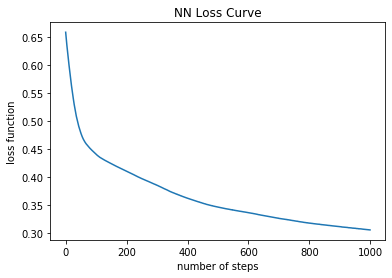

In [23]:
plt.plot(mlp.loss_curve_)
plt.title("NN Loss Curve")
plt.xlabel("number of steps")
plt.ylabel("loss function")
plt.show()

In [24]:
#check out weights

In [25]:
(mlp.intercepts_[0]).shape

(10,)

In [26]:
(mlp.coefs_[0]).shape

(8, 10)

In [27]:
mlp.intercepts_[0]

array([-0.16996324, -0.04837154,  0.7872746 , -0.00490718,  0.47744626,
        0.97452941,  0.24161614, -0.45754974, -0.93970447,  0.57493094])

In [28]:
mlp.coefs_[0]

array([[ 0.06450607,  0.45340503, -0.82707167, -0.84495309,  0.54768028,
         0.25660121,  0.44913885, -0.84846875, -0.55340767,  0.19033995],
       [-1.21406285,  0.60133245, -0.85170952, -0.93221969,  0.04303415,
         0.12599313, -0.49504719,  0.81097301, -0.33393116,  0.68157586],
       [-0.73421541,  0.82898422,  0.14845042, -0.10338916, -0.41935116,
        -0.88963002, -0.2136356 , -0.54135529, -0.15283028,  0.17781525],
       [ 0.48456268, -0.44188762, -0.07666824, -0.0953077 ,  0.86737438,
         0.13707977,  1.20888535, -0.28415101,  0.29190483,  0.66993876],
       [ 0.15359001, -0.14282424, -0.04933794,  0.31581505, -0.87906295,
         0.26540241, -0.565791  ,  0.07220372,  0.56383772, -0.36030885],
       [-0.03550327, -0.04420821, -0.13390837,  0.57882645,  0.38813945,
         0.19232522,  0.74159522,  0.53085293, -0.59559773,  0.67850836],
       [-0.78166837,  0.52249651, -0.50876696, -0.59915009,  0.52901039,
         0.11992768,  0.77050056,  0.19143396

In [29]:

#Adjust the number of hidde Layer/ hidden node to improve the NN performance. Write your code below.


# SVM

In [30]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 1
C1, C2 = 1, 10
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

svm_clfs = []
for gamma, C in hyperparams:
    svm_clf=SVC(kernel="rbf",gamma=gamma, C=C) 
    svm_clf.fit(X_train,y_train)
    svm_clfs.append(svm_clf)

from sklearn.metrics import classification_report, confusion_matrix  
for i, svm_clf in enumerate(svm_clfs):
    predictions = svm_clf.predict(X_test)  
    gamma, C = hyperparams[i]
    print("r=", gamma, "C=", C)
    print("Accuracy=", metrics.accuracy_score(y_test, predictions))
    print(confusion_matrix(y_test,predictions))  
    print(classification_report(y_test,predictions))  


r= 0.1 C= 1
Accuracy= 0.75390625
[[143  24]
 [ 39  50]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       167
           1       0.68      0.56      0.61        89

    accuracy                           0.75       256
   macro avg       0.73      0.71      0.72       256
weighted avg       0.75      0.75      0.75       256

r= 0.1 C= 10
Accuracy= 0.7109375
[[134  33]
 [ 41  48]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       167
           1       0.59      0.54      0.56        89

    accuracy                           0.71       256
   macro avg       0.68      0.67      0.67       256
weighted avg       0.71      0.71      0.71       256

r= 1 C= 1
Accuracy= 0.70703125
[[150  17]
 [ 58  31]]
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       167
           1       0.65      0.35      0.45        89

    accuracy    

# deployment 

In [31]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(mlp, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, y_test)
#print(result)

pred = loaded_model.predict(X_test)
print(pred)


[0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1
 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0
 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1
 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0]


In [32]:
#score the model on a scoring data set

#diabetes_score_data = pd.read_csv('.....csv')

#sc_X = StandardScaler()
#X =  sc_X.fit_transform(diabetes_score_data)

#pred = loaded_model.predict(X)
#print(pred)



In [33]:
np.savetxt("d:/f.csv", pred, fmt="%d", delimiter=",")

# Additional code for your reference: 
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html